In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Mountaincar

### Rewards noattack

In [49]:
mountaincar_rewards_noattack = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_noattack.csv").sample(200, ignore_index=True)
mountaincar_rewards_noattack.shape

(200, 1)

### Rewards attack

In [15]:
mountaincar_rewards_attack_20_p005 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_20%_+005.csv")
mountaincar_rewards_attack_20_pm005 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_20%_+-005.csv")
mountaincar_rewards_attack_20_p01 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_20%_+01.csv")
mountaincar_rewards_attack_20_pm01 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_20%_+-01.csv")

mountaincar_rewards_attack_50_p005 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_50%_+005.csv")
mountaincar_rewards_attack_50_pm005 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_50%_+-005.csv")
mountaincar_rewards_attack_50_p01 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_50%_+01.csv")
mountaincar_rewards_attack_50_pm01 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_50%_+-01.csv")

mountaincar_rewards_attack_70_p005 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_70%_+005.csv")
mountaincar_rewards_attack_70_pm005 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_70%_+-005.csv")
mountaincar_rewards_attack_70_p01 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_70%_+01.csv")
mountaincar_rewards_attack_70_pm01 = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_reward_attack_70%_+-01.csv")

### Grafica comparativa 20%

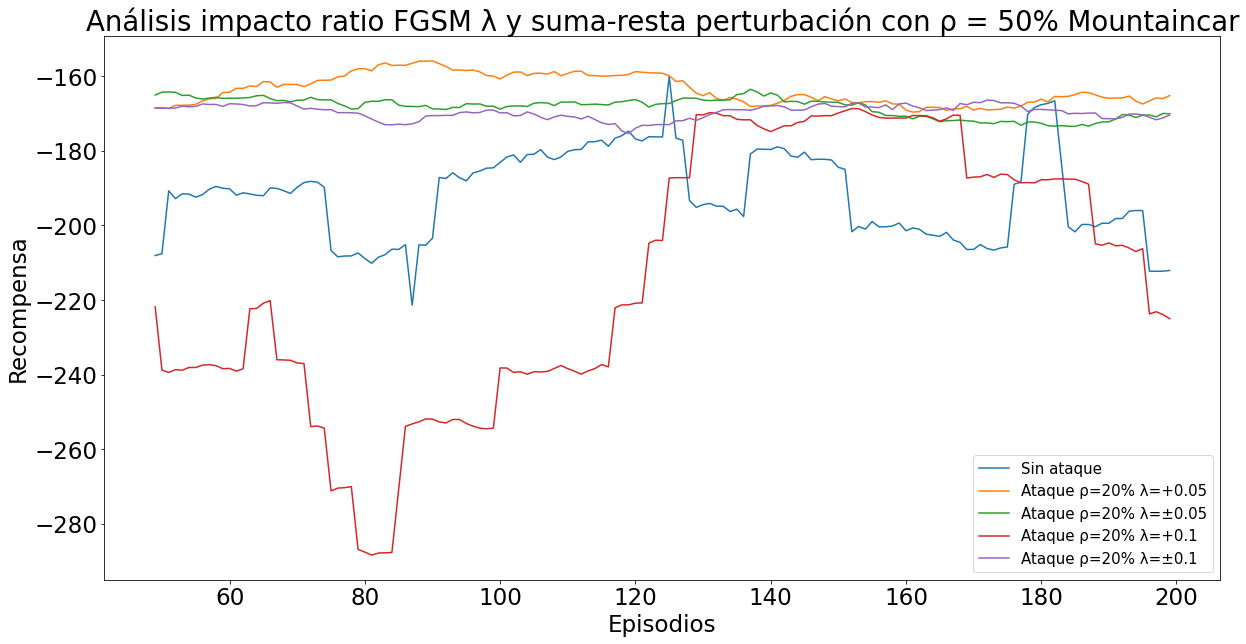

In [60]:
mountaincar_rewards_20 = pd.DataFrame()

mountaincar_rewards_20["Sin ataque"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_20["Ataque ρ=20% λ=+0.05"] = mountaincar_rewards_attack_20_p005.episode_reward.rolling(50).mean()
mountaincar_rewards_20["Ataque ρ=20% λ=±0.05"] = mountaincar_rewards_attack_20_pm005.episode_reward.rolling(50).mean()
mountaincar_rewards_20["Ataque ρ=20% λ=+0.1"] = mountaincar_rewards_attack_20_p01.episode_reward.rolling(50).mean()
mountaincar_rewards_20["Ataque ρ=20% λ=±0.1"] = mountaincar_rewards_attack_20_pm01.episode_reward.rolling(50).mean()


mountaincar_rewards_20.plot(y=["Sin ataque",
                               "Ataque ρ=20% λ=+0.05",
                               "Ataque ρ=20% λ=±0.05",
                               "Ataque ρ=20% λ=+0.1",
                               "Ataque ρ=20% λ=±0.1"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto ratio FGSM λ y suma-resta perturbación con ρ = 50% Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.rcParams['font.size'] = '23'
plt.legend(prop={'size': 15})

### Boxplot 20%

<Figure size 432x288 with 0 Axes>

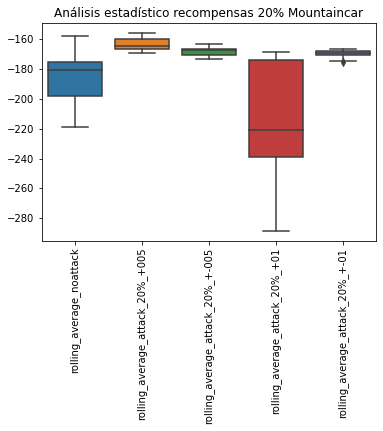

<Figure size 432x288 with 0 Axes>

In [67]:
ax = sns.boxplot(data=mountaincar_rewards_20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title("Análisis estadístico recompensas 20% Mountaincar")
plt.figure()

### Grafica comparativa 50%

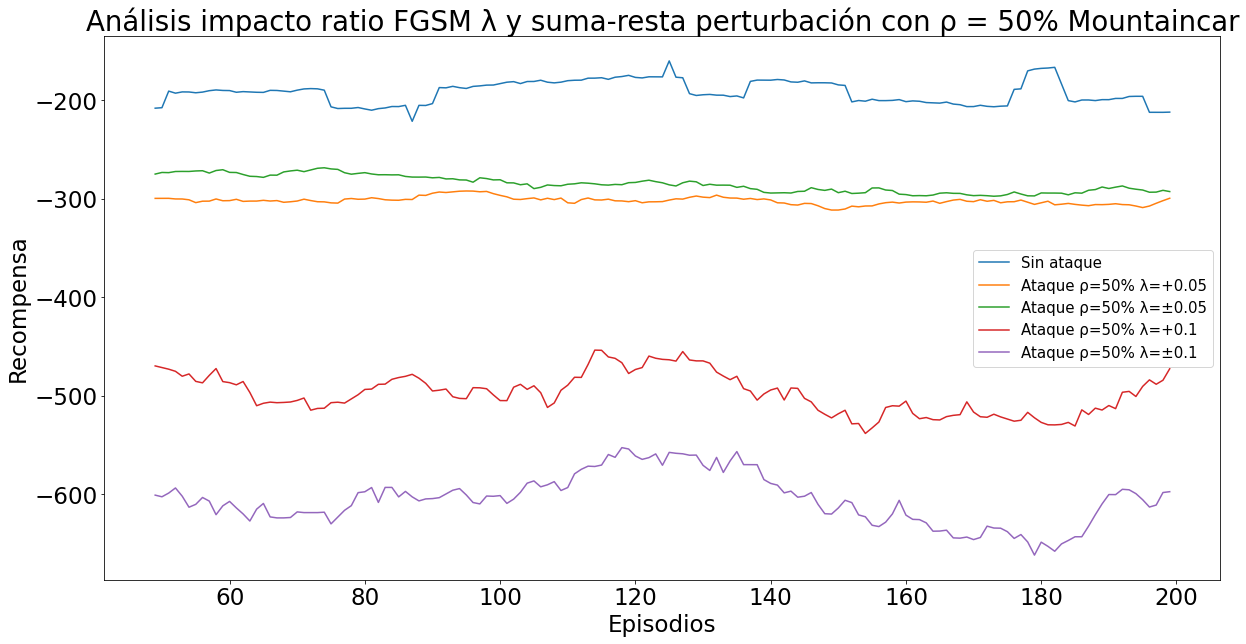

In [58]:
mountaincar_rewards_50 = pd.DataFrame()

mountaincar_rewards_50["Sin ataque"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_50["Ataque ρ=50% λ=+0.05"] = mountaincar_rewards_attack_50_p005.episode_reward.rolling(50).mean()
mountaincar_rewards_50["Ataque ρ=50% λ=±0.05"] = mountaincar_rewards_attack_50_pm005.episode_reward.rolling(50).mean()
mountaincar_rewards_50["Ataque ρ=50% λ=+0.1"] = mountaincar_rewards_attack_50_p01.episode_reward.rolling(50).mean()
mountaincar_rewards_50["Ataque ρ=50% λ=±0.1"] = mountaincar_rewards_attack_50_pm01.episode_reward.rolling(50).mean()


mountaincar_rewards_50.plot(y=["Sin ataque",
                               "Ataque ρ=50% λ=+0.05",
                               "Ataque ρ=50% λ=±0.05",
                               "Ataque ρ=50% λ=+0.1",
                               "Ataque ρ=50% λ=±0.1"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto ratio FGSM λ y suma-resta perturbación con ρ = 50% Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")

plt.rcParams['font.size'] = '23'
plt.legend(prop={'size': 15})

### Grafica comparativa 70%

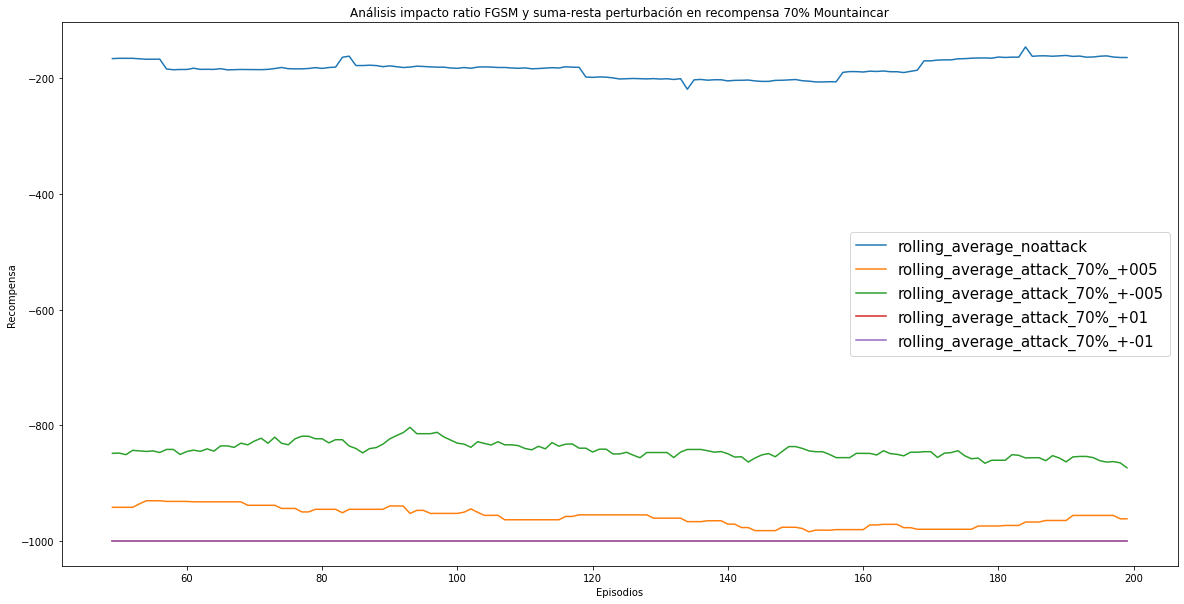

In [6]:
mountaincar_rewards_70 = pd.DataFrame()

mountaincar_rewards_70["rolling_average_noattack"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_70["rolling_average_attack_70%_+005"] = mountaincar_rewards_attack_70_p005.episode_reward.rolling(50).mean()
mountaincar_rewards_70["rolling_average_attack_70%_+-005"] = mountaincar_rewards_attack_70_pm005.episode_reward.rolling(50).mean()
mountaincar_rewards_70["rolling_average_attack_70%_+01"] = mountaincar_rewards_attack_70_p01.episode_reward.rolling(50).mean()
mountaincar_rewards_70["rolling_average_attack_70%_+-01"] = mountaincar_rewards_attack_70_pm01.episode_reward.rolling(50).mean()


mountaincar_rewards_70.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_70%_+005",
                               "rolling_average_attack_70%_+-005",
                               "rolling_average_attack_70%_+01",
                               "rolling_average_attack_70%_+-01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto ratio FGSM y suma-resta perturbación en recompensa 70% Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa +005

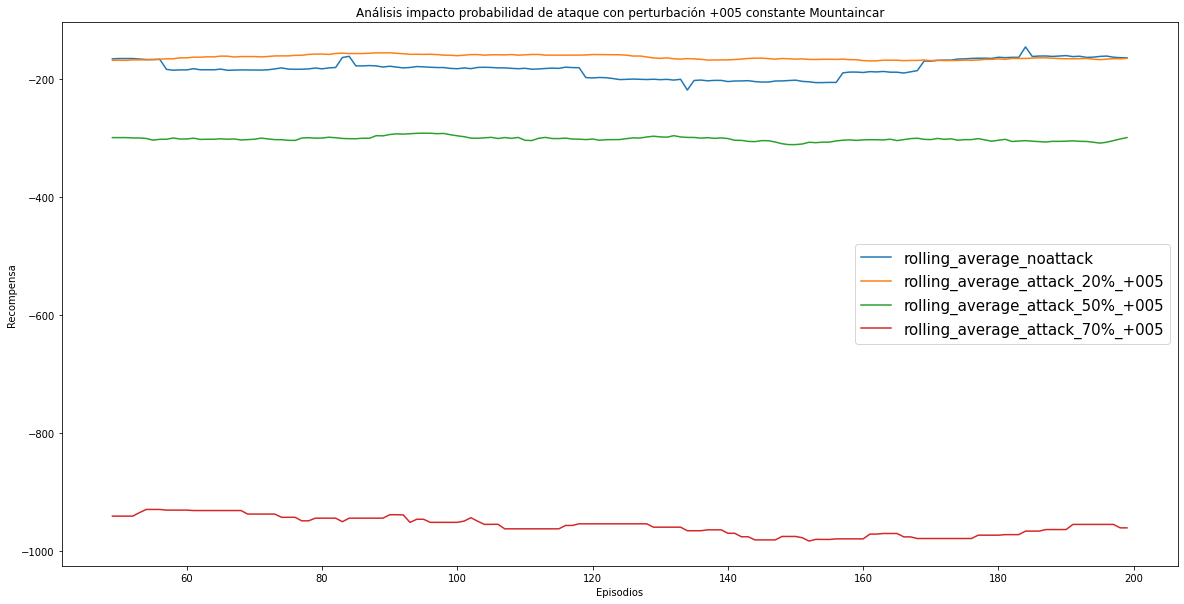

In [7]:
mountaincar_rewards_p005 = pd.DataFrame()

mountaincar_rewards_p005["rolling_average_noattack"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_p005["rolling_average_attack_20%_+005"] = mountaincar_rewards_attack_20_p005.episode_reward.rolling(50).mean()
mountaincar_rewards_p005["rolling_average_attack_50%_+005"] = mountaincar_rewards_attack_50_p005.episode_reward.rolling(50).mean()
mountaincar_rewards_p005["rolling_average_attack_70%_+005"] = mountaincar_rewards_attack_70_p005.episode_reward.rolling(50).mean()


mountaincar_rewards_p005.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+005",
                               "rolling_average_attack_50%_+005",
                               "rolling_average_attack_70%_+005"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque con perturbación +005 constante Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa +-005

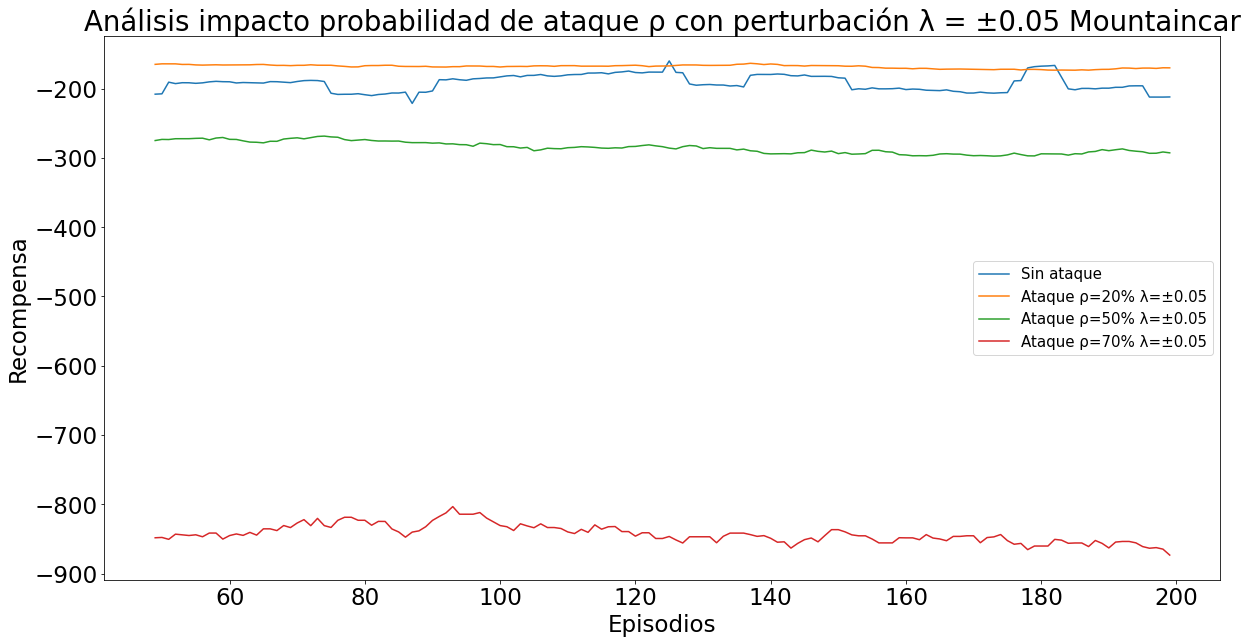

In [57]:
mountaincar_rewards_pm005 = pd.DataFrame()

mountaincar_rewards_pm005["Sin ataque"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_pm005["Ataque ρ=20% λ=±0.05"] = mountaincar_rewards_attack_20_pm005.episode_reward.rolling(50).mean()
mountaincar_rewards_pm005["Ataque ρ=50% λ=±0.05"] = mountaincar_rewards_attack_50_pm005.episode_reward.rolling(50).mean()
mountaincar_rewards_pm005["Ataque ρ=70% λ=±0.05"] = mountaincar_rewards_attack_70_pm005.episode_reward.rolling(50).mean()


mountaincar_rewards_pm005.plot(y=["Sin ataque",
                               "Ataque ρ=20% λ=±0.05",
                               "Ataque ρ=50% λ=±0.05",
                               "Ataque ρ=70% λ=±0.05"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque ρ con perturbación λ = ±0.05 Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")

plt.rcParams['font.size'] = '23'
plt.legend(prop={'size': 15})

### Grafica comparativa +01

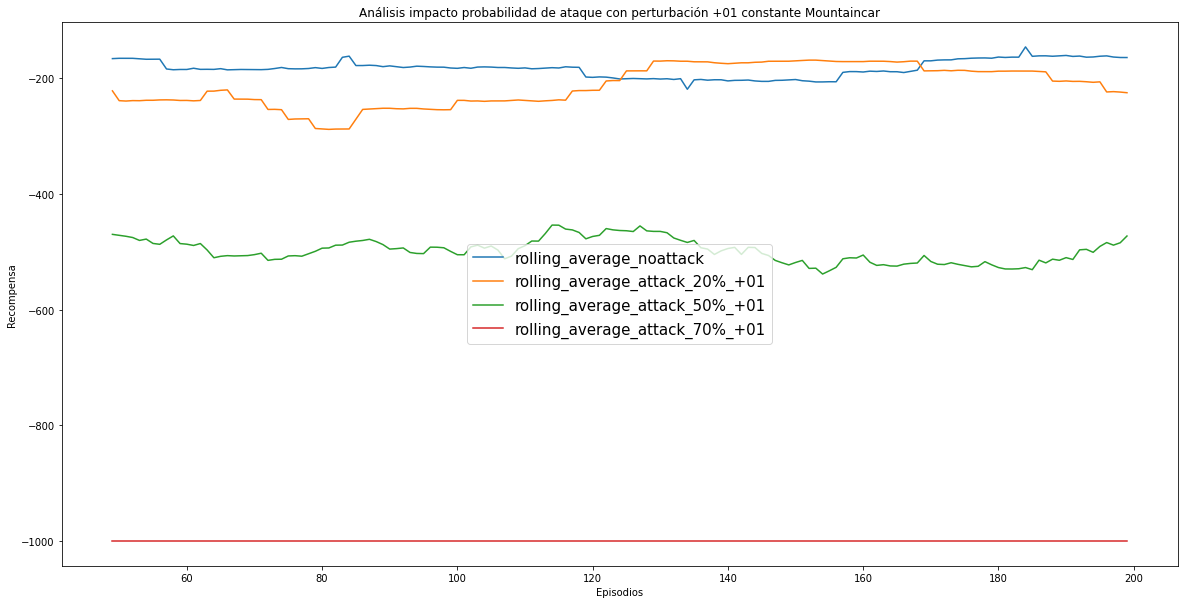

In [9]:
mountaincar_rewards_p01 = pd.DataFrame()

mountaincar_rewards_p01["rolling_average_noattack"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_p01["rolling_average_attack_20%_+01"] = mountaincar_rewards_attack_20_p01.episode_reward.rolling(50).mean()
mountaincar_rewards_p01["rolling_average_attack_50%_+01"] = mountaincar_rewards_attack_50_p01.episode_reward.rolling(50).mean()
mountaincar_rewards_p01["rolling_average_attack_70%_+01"] = mountaincar_rewards_attack_70_p01.episode_reward.rolling(50).mean()


mountaincar_rewards_p01.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+01",
                               "rolling_average_attack_50%_+01",
                               "rolling_average_attack_70%_+01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque con perturbación +01 constante Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa +-01

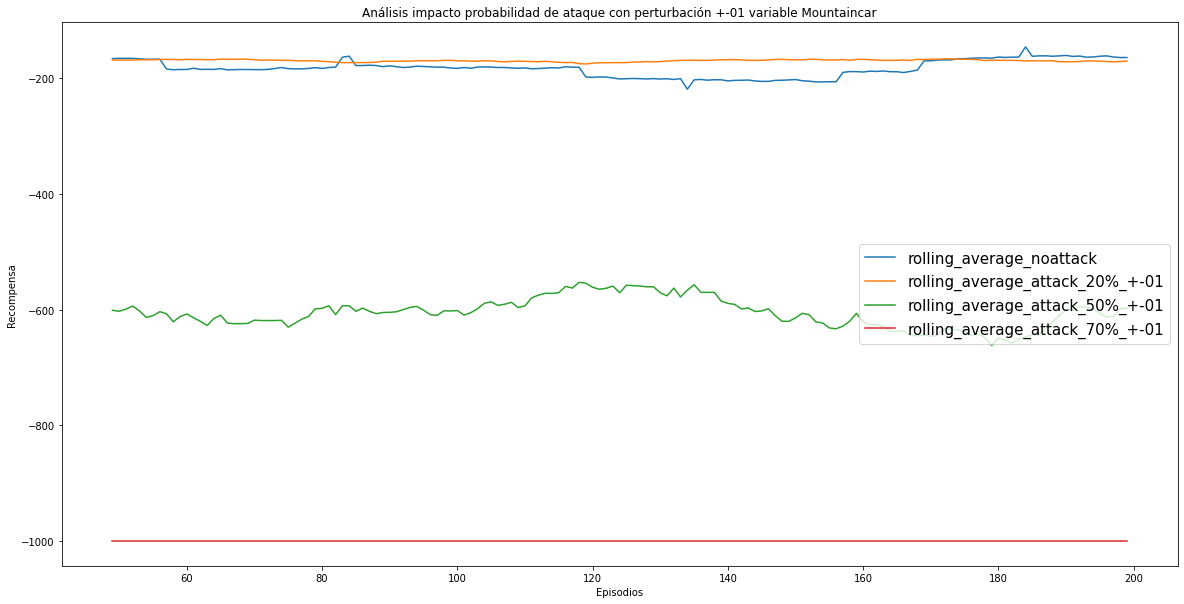

In [10]:
mountaincar_rewards_pm01 = pd.DataFrame()

mountaincar_rewards_pm01["rolling_average_noattack"] = mountaincar_rewards_noattack.episode_reward.rolling(50).mean()
mountaincar_rewards_pm01["rolling_average_attack_20%_+-01"] = mountaincar_rewards_attack_20_pm01.episode_reward.rolling(50).mean()
mountaincar_rewards_pm01["rolling_average_attack_50%_+-01"] = mountaincar_rewards_attack_50_pm01.episode_reward.rolling(50).mean()
mountaincar_rewards_pm01["rolling_average_attack_70%_+-01"] = mountaincar_rewards_attack_70_pm01.episode_reward.rolling(50).mean()


mountaincar_rewards_pm01.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+-01",
                               "rolling_average_attack_50%_+-01",
                               "rolling_average_attack_70%_+-01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque con perturbación +-01 variable Mountaincar",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Analisis tuplas Mountaincar

[Text(0.5, 1.0, "Tuplas 'noattack' Mountaincar")]

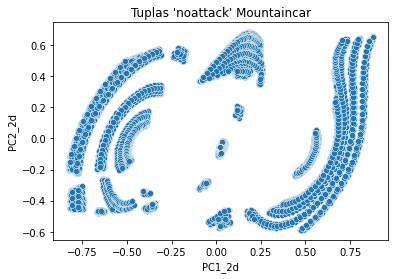

In [74]:
normalize = True

mountaincar_tuples_noattack = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_noattack.csv")

if normalize:
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(mountaincar_tuples_noattack.values)
    mountaincar_tuples_noattack = pd.DataFrame(x_scaled, columns=mountaincar_tuples_noattack.columns)
    
pca_2d = PCA(n_components=2)
mountaincar_tuples_2d_noattack = pd.DataFrame(pca_2d.fit_transform(mountaincar_tuples_noattack.values))
mountaincar_tuples_2d_noattack.columns = ["PC1_2d", "PC2_2d"]

sns.scatterplot(data=mountaincar_tuples_2d_noattack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'noattack' Mountaincar")

[Text(0.5, 1.0, 'Centroides de clusterizacion KMeans Mountaincar')]

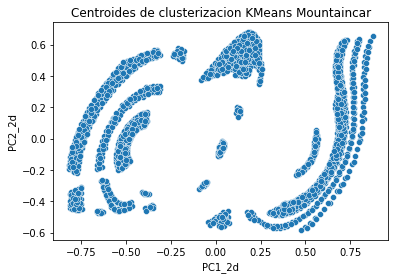

In [75]:
kmeans = pickle.load(open("kmeans_mountaincar_2048c_norm.pkl", "rb"))
mountaincar_centroids_2d_df = pd.DataFrame(pca_2d.transform(kmeans.cluster_centers_))
mountaincar_centroids_2d_df.columns = ["PC1_2d", "PC2_2d"]
sns.scatterplot(data=mountaincar_centroids_2d_df, x='PC1_2d', y='PC2_2d').set(title="Centroides de clusterizacion KMeans Mountaincar")

[Text(0.5, 1.0, "Tuplas 'attack' Mountaincar | Suma perturbación")]

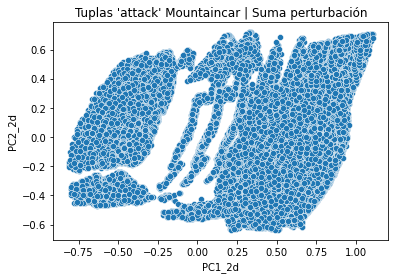

In [76]:
mountaincar_tuples_attack = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_attack_50%_+005.csv")

if normalize:
    x_scaled = min_max_scaler.transform(mountaincar_tuples_attack.values)
    mountaincar_tuples_attack = pd.DataFrame(x_scaled, columns=mountaincar_tuples_attack.columns)
    
mountaincar_tuples_2d_attack = pd.DataFrame(pca_2d.transform(mountaincar_tuples_attack.values))
mountaincar_tuples_2d_attack.columns = ["PC1_2d", "PC2_2d"]

sns.scatterplot(data=mountaincar_tuples_2d_attack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'attack' Mountaincar | Suma perturbación")

[Text(0.5, 1.0, "Tuplas 'attack' Mountaincar | Suma-resta perturbación")]

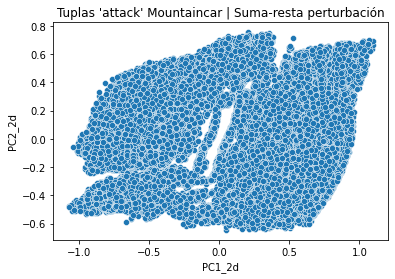

In [77]:
mountaincar_tuples_attack = pd.read_csv("../ejecuciones_mountaincar_tfm/mountaincar_attack_50%_+-005.csv")

if normalize:
    x_scaled = min_max_scaler.transform(mountaincar_tuples_attack.values)
    mountaincar_tuples_attack = pd.DataFrame(x_scaled, columns=mountaincar_tuples_attack.columns)
    
mountaincar_tuples_2d_attack = pd.DataFrame(pca_2d.transform(mountaincar_tuples_attack.values))
mountaincar_tuples_2d_attack.columns = ["PC1_2d", "PC2_2d"]

sns.scatterplot(data=mountaincar_tuples_2d_attack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'attack' Mountaincar | Suma-resta perturbación")

# Cartpole

### Rewards noattack

In [51]:
cartpole_rewards_noattack = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_noattack.csv").sample(200, ignore_index=True)
cartpole_rewards_noattack.shape

(200, 1)

### Rewards attack

In [52]:
cartpole_rewards_attack_20_p005 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_20%_+005.csv")
cartpole_rewards_attack_20_pm005 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_20%_+-005.csv")
cartpole_rewards_attack_20_p01 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_20%_+01.csv")
cartpole_rewards_attack_20_pm01 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_20%_+-01.csv")

cartpole_rewards_attack_50_p005 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_50%_+005.csv")
cartpole_rewards_attack_50_pm005 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_50%_+-005.csv")
cartpole_rewards_attack_50_p01 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_50%_+01.csv")
cartpole_rewards_attack_50_pm01 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_50%_+-01.csv")

cartpole_rewards_attack_70_p005 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_70%_+005.csv")
cartpole_rewards_attack_70_pm005 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_70%_+-005.csv")
cartpole_rewards_attack_70_p01 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_70%_+01.csv")
cartpole_rewards_attack_70_pm01 = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_reward_attack_70%_+-01.csv")

### Grafica comparativa 20%

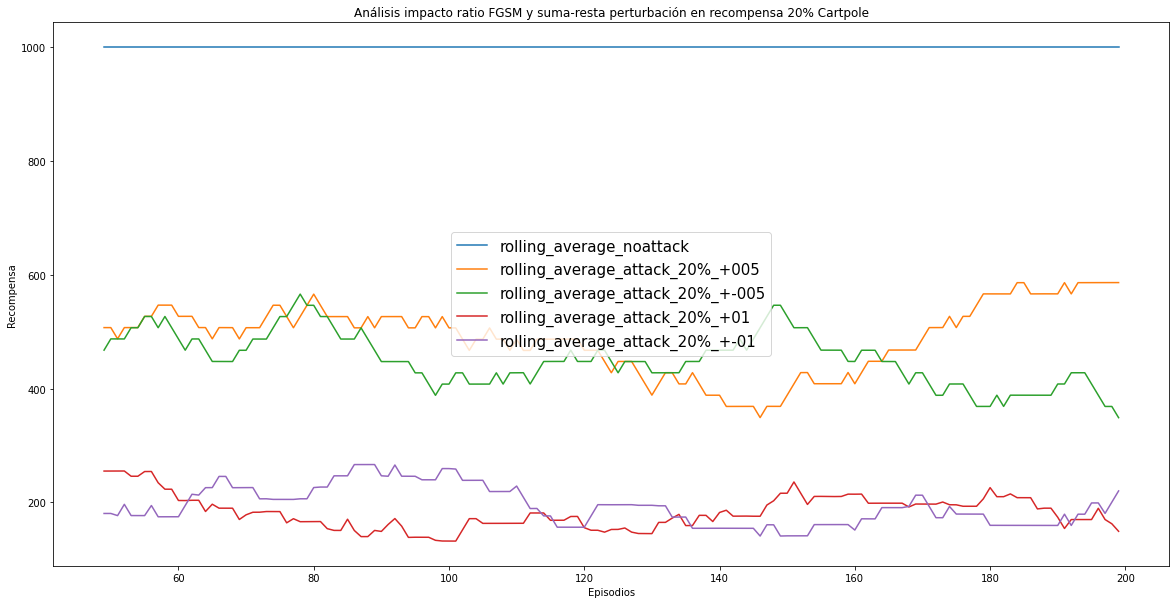

In [13]:
cartpole_rewards_20 = pd.DataFrame()

cartpole_rewards_20["rolling_average_noattack"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_20["rolling_average_attack_20%_+005"] = cartpole_rewards_attack_20_p005.episode_reward.rolling(50).mean()
cartpole_rewards_20["rolling_average_attack_20%_+-005"] = cartpole_rewards_attack_20_pm005.episode_reward.rolling(50).mean()
cartpole_rewards_20["rolling_average_attack_20%_+01"] = cartpole_rewards_attack_20_p01.episode_reward.rolling(50).mean()
cartpole_rewards_20["rolling_average_attack_20%_+-01"] = cartpole_rewards_attack_20_pm01.episode_reward.rolling(50).mean()


cartpole_rewards_20.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+005",
                               "rolling_average_attack_20%_+-005",
                               "rolling_average_attack_20%_+01",
                               "rolling_average_attack_20%_+-01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto ratio FGSM y suma-resta perturbación en recompensa 20% Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa 50%

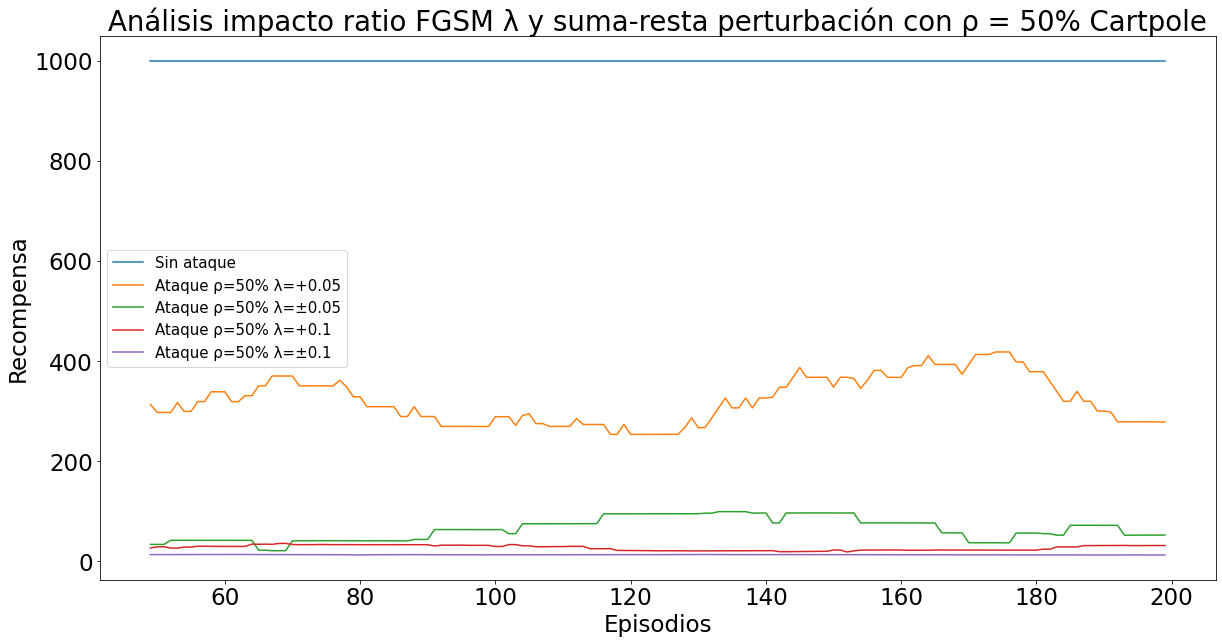

In [59]:
cartpole_rewards_50 = pd.DataFrame()

cartpole_rewards_50["Sin ataque"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_50["Ataque ρ=50% λ=+0.05"] = cartpole_rewards_attack_50_p005.episode_reward.rolling(50).mean()
cartpole_rewards_50["Ataque ρ=50% λ=±0.05"] = cartpole_rewards_attack_50_pm005.episode_reward.rolling(50).mean()
cartpole_rewards_50["Ataque ρ=50% λ=+0.1"] = cartpole_rewards_attack_50_p01.episode_reward.rolling(50).mean()
cartpole_rewards_50["Ataque ρ=50% λ=±0.1"] = cartpole_rewards_attack_50_pm01.episode_reward.rolling(50).mean()


cartpole_rewards_50.plot(y=["Sin ataque",
                               "Ataque ρ=50% λ=+0.05",
                               "Ataque ρ=50% λ=±0.05",
                               "Ataque ρ=50% λ=+0.1",
                               "Ataque ρ=50% λ=±0.1"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto ratio FGSM λ y suma-resta perturbación con ρ = 50% Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")

plt.rcParams['font.size'] = '23'
plt.legend(prop={'size': 15})

### Grafica comparativa 70%

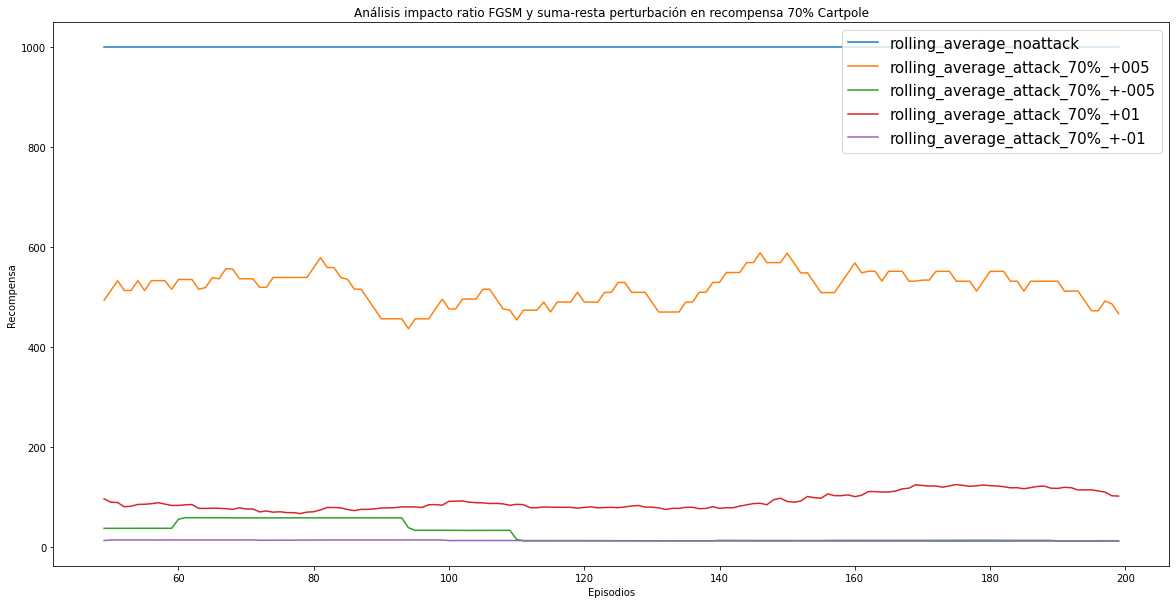

In [15]:
cartpole_rewards_70 = pd.DataFrame()

cartpole_rewards_70["rolling_average_noattack"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_70["rolling_average_attack_70%_+005"] = cartpole_rewards_attack_70_p005.episode_reward.rolling(50).mean()
cartpole_rewards_70["rolling_average_attack_70%_+-005"] = cartpole_rewards_attack_70_pm005.episode_reward.rolling(50).mean()
cartpole_rewards_70["rolling_average_attack_70%_+01"] = cartpole_rewards_attack_70_p01.episode_reward.rolling(50).mean()
cartpole_rewards_70["rolling_average_attack_70%_+-01"] = cartpole_rewards_attack_70_pm01.episode_reward.rolling(50).mean()


cartpole_rewards_70.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_70%_+005",
                               "rolling_average_attack_70%_+-005",
                               "rolling_average_attack_70%_+01",
                               "rolling_average_attack_70%_+-01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto ratio FGSM y suma-resta perturbación en recompensa 70% Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa +005

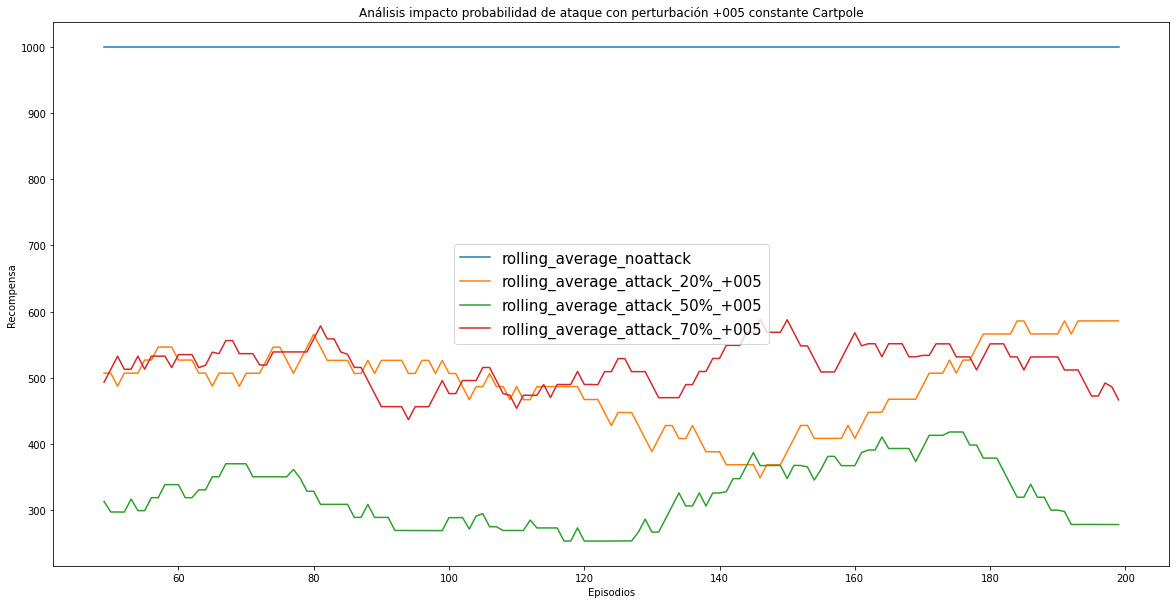

In [16]:
cartpole_rewards_p005 = pd.DataFrame()

cartpole_rewards_p005["rolling_average_noattack"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_p005["rolling_average_attack_20%_+005"] = cartpole_rewards_attack_20_p005.episode_reward.rolling(50).mean()
cartpole_rewards_p005["rolling_average_attack_50%_+005"] = cartpole_rewards_attack_50_p005.episode_reward.rolling(50).mean()
cartpole_rewards_p005["rolling_average_attack_70%_+005"] = cartpole_rewards_attack_70_p005.episode_reward.rolling(50).mean()


cartpole_rewards_p005.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+005",
                               "rolling_average_attack_50%_+005",
                               "rolling_average_attack_70%_+005"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque con perturbación +005 constante Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa +-005

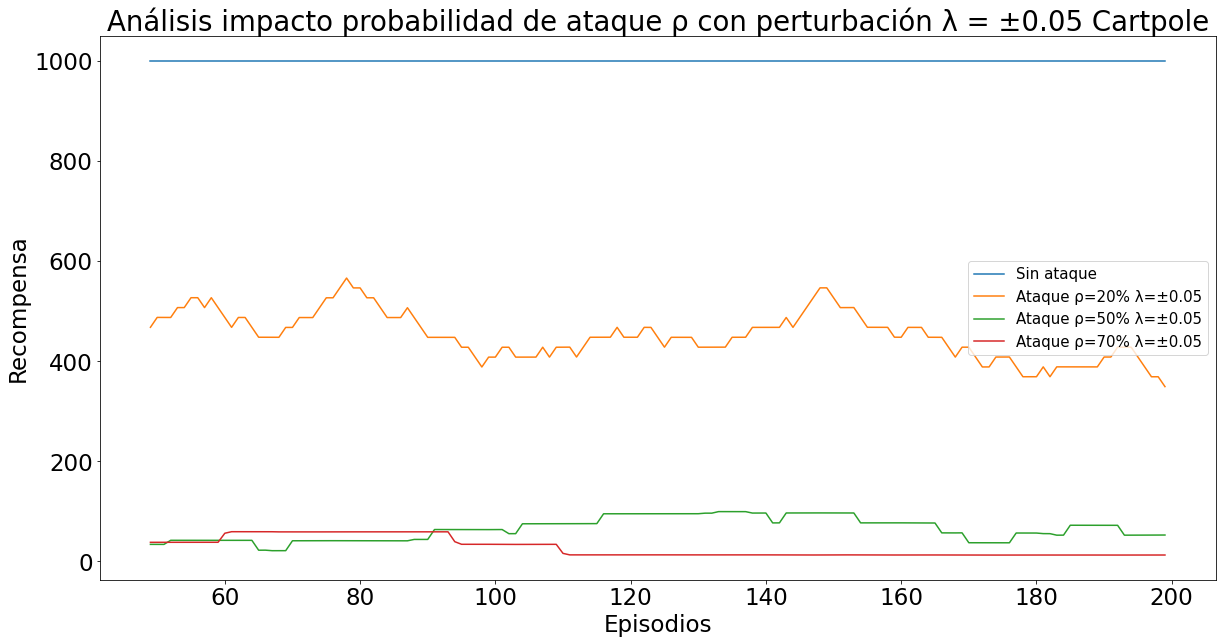

In [56]:
cartpole_rewards_pm005 = pd.DataFrame()

cartpole_rewards_pm005["Sin ataque"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_pm005["Ataque ρ=20% λ=±0.05"] = cartpole_rewards_attack_20_pm005.episode_reward.rolling(50).mean()
cartpole_rewards_pm005["Ataque ρ=50% λ=±0.05"] = cartpole_rewards_attack_50_pm005.episode_reward.rolling(50).mean()
cartpole_rewards_pm005["Ataque ρ=70% λ=±0.05"] = cartpole_rewards_attack_70_pm005.episode_reward.rolling(50).mean()


cartpole_rewards_pm005.plot(y=["Sin ataque",
                               "Ataque ρ=20% λ=±0.05",
                               "Ataque ρ=50% λ=±0.05",
                               "Ataque ρ=70% λ=±0.05"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque ρ con perturbación λ = ±0.05 Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.rcParams['font.size'] = '23'
plt.legend(prop={'size': 15})

### Grafica comparativa +01

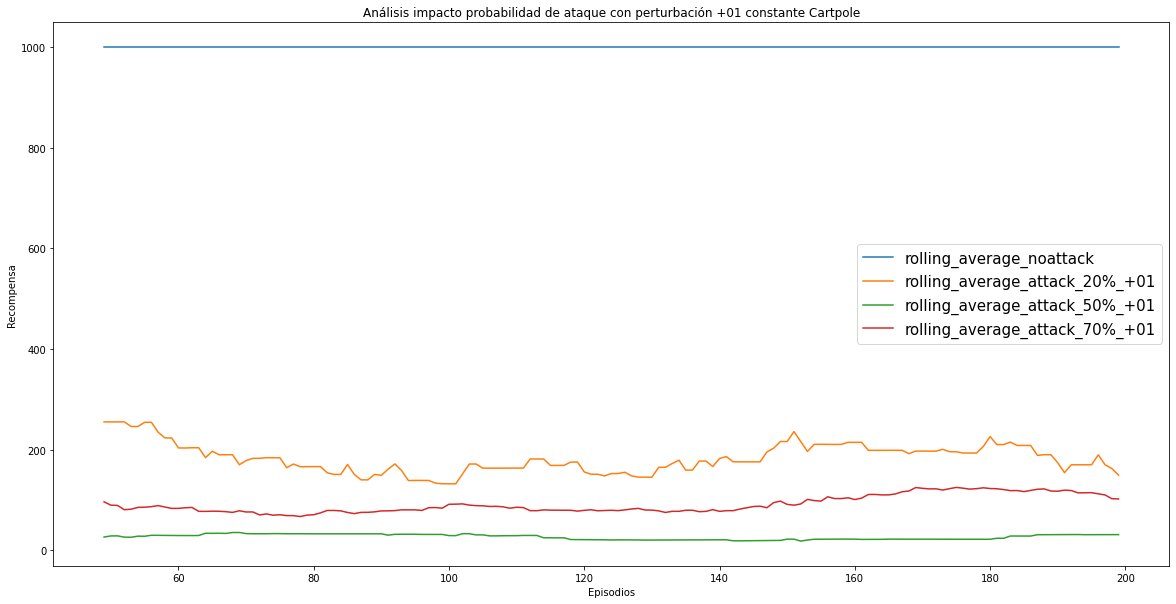

In [18]:
cartpole_rewards_p01 = pd.DataFrame()

cartpole_rewards_p01["rolling_average_noattack"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_p01["rolling_average_attack_20%_+01"] = cartpole_rewards_attack_20_p01.episode_reward.rolling(50).mean()
cartpole_rewards_p01["rolling_average_attack_50%_+01"] = cartpole_rewards_attack_50_p01.episode_reward.rolling(50).mean()
cartpole_rewards_p01["rolling_average_attack_70%_+01"] = cartpole_rewards_attack_70_p01.episode_reward.rolling(50).mean()


cartpole_rewards_p01.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+01",
                               "rolling_average_attack_50%_+01",
                               "rolling_average_attack_70%_+01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque con perturbación +01 constante Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Grafica comparativa +-01

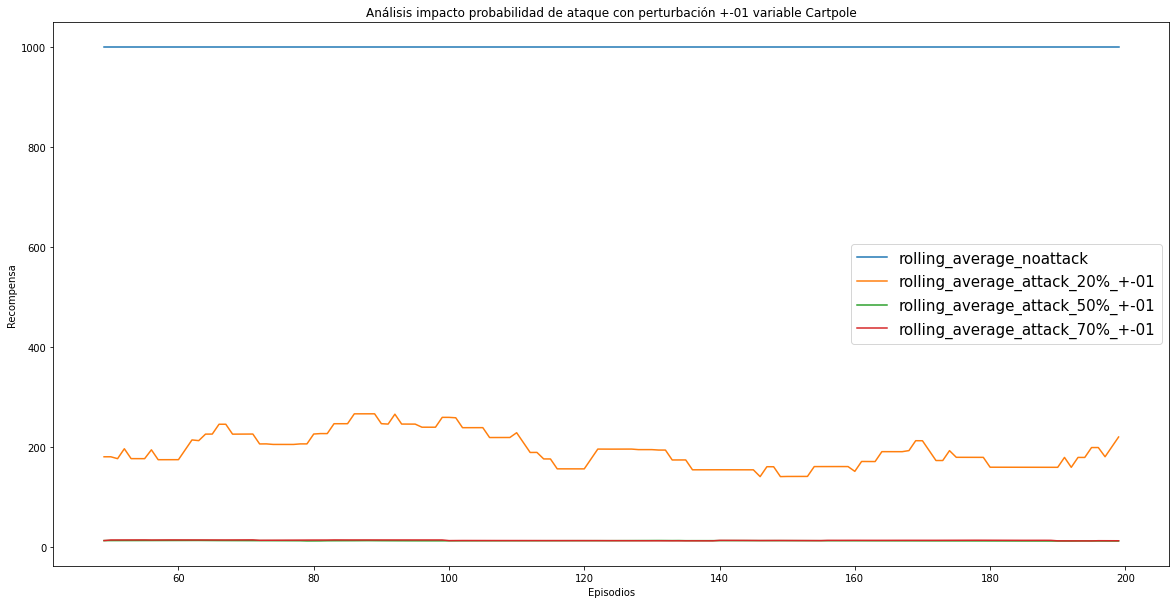

In [19]:
cartpole_rewards_pm01 = pd.DataFrame()

cartpole_rewards_pm01["rolling_average_noattack"] = cartpole_rewards_noattack.episode_reward.rolling(50).mean()
cartpole_rewards_pm01["rolling_average_attack_20%_+-01"] = cartpole_rewards_attack_20_pm01.episode_reward.rolling(50).mean()
cartpole_rewards_pm01["rolling_average_attack_50%_+-01"] = cartpole_rewards_attack_50_pm01.episode_reward.rolling(50).mean()
cartpole_rewards_pm01["rolling_average_attack_70%_+-01"] = cartpole_rewards_attack_70_pm01.episode_reward.rolling(50).mean()


cartpole_rewards_pm01.plot(y=["rolling_average_noattack",
                               "rolling_average_attack_20%_+-01",
                               "rolling_average_attack_50%_+-01",
                               "rolling_average_attack_70%_+-01"],
                               kind="line",
                               figsize=(20,10),
                               title="Análisis impacto probabilidad de ataque con perturbación +-01 variable Cartpole",
                               xlabel="Episodios",
                               ylabel="Recompensa")
plt.legend(prop={'size': 15})

### Analisis tuplas Cartpole

[Text(0.5, 1.0, "Tuplas 'noattack' Cartpole")]

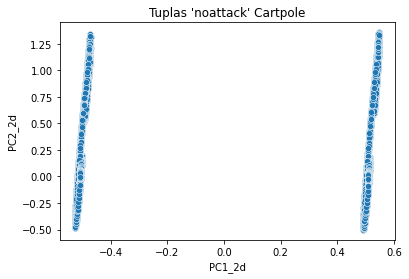

In [25]:
normalize = True

cartpole_tuples_noattack = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_noattack.csv")

if normalize:
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(cartpole_tuples_noattack.values)
    cartpole_tuples_noattack = pd.DataFrame(x_scaled, columns=cartpole_tuples_noattack.columns)
    
pca_2d = PCA(n_components=2)
cartpole_tuples_2d_noattack = pd.DataFrame(pca_2d.fit_transform(cartpole_tuples_noattack.values))
cartpole_tuples_2d_noattack.columns = ["PC1_2d", "PC2_2d"]

sns.scatterplot(data=cartpole_tuples_2d_noattack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'noattack' Cartpole")

[Text(0.5, 1.0, 'Centroides de clusterizacion KMeans Cartpole')]

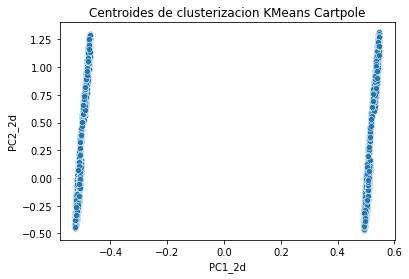

In [26]:
kmeans = pickle.load(open("kmeans_cartpole_2048c_norm.pkl", "rb"))
cartpole_centroids_2d_df = pd.DataFrame(pca_2d.transform(kmeans.cluster_centers_))
cartpole_centroids_2d_df.columns = ["PC1_2d", "PC2_2d"]
sns.scatterplot(data=cartpole_centroids_2d_df, x='PC1_2d', y='PC2_2d').set(title="Centroides de clusterizacion KMeans Cartpole")

[Text(0.5, 1.0, "Tuplas 'attack' Cartpole | Suma perturbación")]

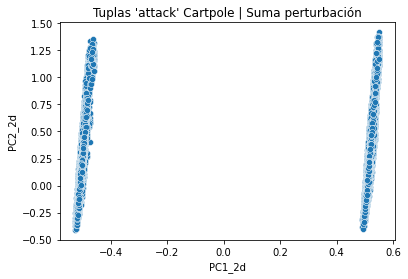

In [27]:
cartpole_tuples_attack = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_attack_50%_+005.csv")

if normalize:
    x_scaled = min_max_scaler.transform(cartpole_tuples_attack.values)
    cartpole_tuples_attack = pd.DataFrame(x_scaled, columns=cartpole_tuples_attack.columns)
    
cartpole_tuples_2d_attack = pd.DataFrame(pca_2d.transform(cartpole_tuples_attack.values))
cartpole_tuples_2d_attack.columns = ["PC1_2d", "PC2_2d"]

sns.scatterplot(data=cartpole_tuples_2d_attack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'attack' Cartpole | Suma perturbación")

[Text(0.5, 1.0, "Tuplas 'attack' Cartpole | Suma-resta perturbación")]

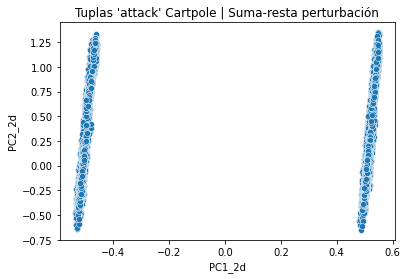

In [28]:
cartpole_tuples_attack = pd.read_csv("../ejecuciones_cartpole_tfm/cartpole_attack_50%_+-005.csv")

if normalize:
    x_scaled = min_max_scaler.transform(cartpole_tuples_attack.values)
    cartpole_tuples_attack = pd.DataFrame(x_scaled, columns=cartpole_tuples_attack.columns)
    
cartpole_tuples_2d_attack = pd.DataFrame(pca_2d.transform(cartpole_tuples_attack.values))
cartpole_tuples_2d_attack.columns = ["PC1_2d", "PC2_2d"]

sns.scatterplot(data=cartpole_tuples_2d_attack, x='PC1_2d', y='PC2_2d').set(title="Tuplas 'attack' Cartpole | Suma-resta perturbación")